In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [6]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [7]:
test_y = data_test.iloc[:, 0] 

In [8]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [9]:
test_X = data_test.iloc[:, 1:] 

test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [11]:
train_auc_list = []
val_auc_list = []

for i in range (40, 500, 10):  # Start from 40, increase by 10 up to 500
    gbm_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=i, random_state=321)
    #"Let's start by setting a learning rate, not too high."
    gbm_model.fit(train_X, train_y)
    
    # Calculate AUC for the training set
    train_pred_proba = gbm_model.predict_proba(train_X)[:, 1]
    train_auc = roc_auc_score(train_y, train_pred_proba)
    train_auc_list.append(train_auc)
    
    # Calculate AUC for the validation set
    val_pred_proba = gbm_model.predict_proba(test_X)[:, 1]
    val_auc = roc_auc_score(test_y, val_pred_proba)
    val_auc_list.append(val_auc)
    
    print(f"n_estimators = {i}, Training AUC: {train_auc}, Validation AUC: {val_auc}")

# Print AUC lists
print("Training AUC list:", train_auc_list)
print("Validation AUC list:", val_auc_list)

n_estimators = 40, Training AUC: 0.9293760514958671, Validation AUC: 0.887363184079602
n_estimators = 50, Training AUC: 0.9299063711506108, Validation AUC: 0.8890547263681592
n_estimators = 60, Training AUC: 0.9307109940750494, Validation AUC: 0.8894527363184079
n_estimators = 70, Training AUC: 0.9318082071538293, Validation AUC: 0.8888557213930349
n_estimators = 80, Training AUC: 0.9327956989247311, Validation AUC: 0.8882587064676617
n_estimators = 90, Training AUC: 0.9358861824299612, Validation AUC: 0.8895522388059701
n_estimators = 100, Training AUC: 0.9368919610855094, Validation AUC: 0.889950248756219
n_estimators = 110, Training AUC: 0.9393058298588253, Validation AUC: 0.8885572139303483
n_estimators = 120, Training AUC: 0.9421402969790067, Validation AUC: 0.8921393034825871
n_estimators = 130, Training AUC: 0.9456148050618096, Validation AUC: 0.8956218905472637
n_estimators = 140, Training AUC: 0.9471326164874552, Validation AUC: 0.8942288557213931
n_estimators = 150, Training 

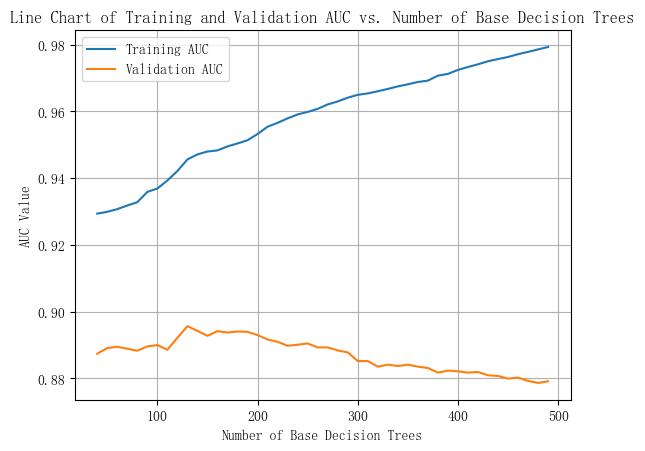

In [12]:
import matplotlib.pyplot as plt

# Set global font
plt.rcParams['font.family'] = 'SimSun'

# Range of base decision tree numbers
n_estimators_range = list(range(40, 500, 10))

# Plot the line chart for AUC of training and validation sets
plt.plot(n_estimators_range, train_auc_list, label='Training AUC')
plt.plot(n_estimators_range, val_auc_list, label='Validation AUC')

# Add title and labels
plt.title('Line Chart of Training and Validation AUC vs. Number of Base Decision Trees')
plt.xlabel('Number of Base Decision Trees')
plt.ylabel('AUC Value')
plt.legend()  # Add legend

# Display the plot
plt.grid(True)
plt.show()

In [13]:
    gbm_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100,random_state=321)
    gbm_model.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.01, random_state=321)

min_samples_split=8, max_depth=3, Train AUC=0.9362153463535952, Validation AUC=0.889950248756219
min_samples_split=8, max_depth=4, Train AUC=0.9584887718528271, Validation AUC=0.8871641791044775
min_samples_split=8, max_depth=5, Train AUC=0.9792443859264135, Validation AUC=0.8819900497512437
min_samples_split=8, max_depth=6, Train AUC=0.9919171969863214, Validation AUC=0.8732338308457712
min_samples_split=8, max_depth=7, Train AUC=0.9961231804549776, Validation AUC=0.8780099502487562
min_samples_split=8, max_depth=8, Train AUC=0.9973666886109283, Validation AUC=0.8664676616915423
min_samples_split=9, max_depth=3, Train AUC=0.934935264428352, Validation AUC=0.8899502487562189
min_samples_split=9, max_depth=4, Train AUC=0.9573549850047546, Validation AUC=0.8892537313432836
min_samples_split=9, max_depth=5, Train AUC=0.9790249433106576, Validation AUC=0.8791044776119402
min_samples_split=9, max_depth=6, Train AUC=0.9913685904469315, Validation AUC=0.8734328358208955
min_samples_split=9, m

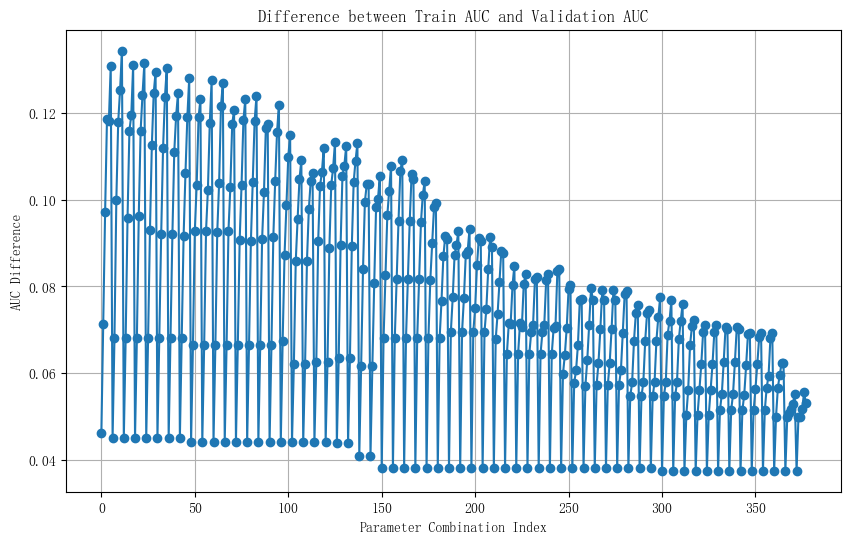

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# New parameter ranges
min_samples_split_range = range(8, 71)
max_depth_range = range(3, 9)

# Create empty lists to store training and validation AUC values for each parameter combination
train_auc_results = []
val_auc_results = []

# Loop through different parameter combinations
for min_samples_split in min_samples_split_range:
    for max_depth in max_depth_range:
        # Initialize GBM model and set parameters
        gbm_model = GradientBoostingClassifier(learning_rate=0.01,
                                               n_estimators=100,
                                               min_samples_split=min_samples_split,
                                               max_depth=max_depth,
                                               random_state=321)
        
        # Train the model
        gbm_model.fit(train_X, train_y)
        
        # Predict probabilities for training and validation sets
        train_pred_proba = gbm_model.predict_proba(train_X)[:, 1]
        val_pred_proba = gbm_model.predict_proba(test_X)[:, 1]
        
        # Calculate training and validation AUC
        train_auc = roc_auc_score(train_y, train_pred_proba)
        val_auc = roc_auc_score(test_y, val_pred_proba)
        
        # Store parameter combination and corresponding training/validation AUC values
        train_auc_results.append((min_samples_split, max_depth, train_auc))
        val_auc_results.append((min_samples_split, max_depth, val_auc))

# Print training and validation AUC values for each parameter combination
for (min_samples_split_train, max_depth_train, train_auc), (min_samples_split_val, max_depth_val, val_auc) in zip(train_auc_results, val_auc_results):
    print(f"min_samples_split={min_samples_split_train}, max_depth={max_depth_train}, Train AUC={train_auc}, Validation AUC={val_auc}")

# Calculate the difference between training and validation AUC
auc_diff = np.array([train_auc - val_auc for (_, _, train_auc), (_, _, val_auc) in zip(train_auc_results, val_auc_results)])

# Visualize the difference between training and validation AUC
plt.figure(figsize=(10, 6))
plt.plot(auc_diff, marker='o', linestyle='-')
plt.title('Difference between Train AUC and Validation AUC')
plt.xlabel('Parameter Combination Index')
plt.ylabel('AUC Difference')
plt.grid(True)
plt.show()

In [15]:
import pandas as pd

# Create a DataFrame to store training and validation AUC values
results_df = pd.DataFrame(columns=['min_samples_split', 'max_depth', 'Train AUC', 'Validation AUC'])

# Fill the DataFrame
for i, ((min_samples_split_train, max_depth_train, train_auc), (min_samples_split_val, max_depth_val, val_auc)) in enumerate(zip(train_auc_results, val_auc_results)):
    results_df.loc[i] = [min_samples_split_train, max_depth_train, train_auc, val_auc]

# Print the DataFrame
print(results_df)

     min_samples_split  max_depth  Train AUC  Validation AUC
0                  8.0        3.0   0.936215        0.889950
1                  8.0        4.0   0.958489        0.887164
2                  8.0        5.0   0.979244        0.881990
3                  8.0        6.0   0.991917        0.873234
4                  8.0        7.0   0.996123        0.878010
..                 ...        ...        ...             ...
373               70.0        4.0   0.944371        0.894527
374               70.0        5.0   0.946218        0.896418
375               70.0        6.0   0.948029        0.896318
376               70.0        7.0   0.949473        0.893930
377               70.0        8.0   0.950424        0.897313

[378 rows x 4 columns]


In [16]:
# Calculate the difference between training and validation AUC
auc_diff = np.array([train_auc - val_auc for (_, _, train_auc), (_, _, val_auc) in zip(train_auc_results, val_auc_results)])

# Find the indices of the 15 smallest differences
min_diff_indices = np.argsort(np.abs(auc_diff))[:15]

# Print the 15 parameter combinations with the smallest differences
print("Top 15 parameter combinations with the smallest differences:")
for idx in min_diff_indices:
    (min_samples_split_train, max_depth_train, train_auc), (min_samples_split_val, max_depth_val, val_auc) = train_auc_results[idx], val_auc_results[idx]
    print(f"min_samples_split={min_samples_split_train}, max_depth={max_depth_train}, Train AUC={train_auc}, Validation AUC={val_auc}")


Top 15 parameter combinations with the smallest differences:
min_samples_split=63, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=60, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=59, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=64, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=58, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=65, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=66, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=67, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=62, max_depth=3, Train AUC=0.9312047399605003, Validation AUC=0.8937313432835822
min_samples_split=68, max_depth=3, Train AUC=0.9

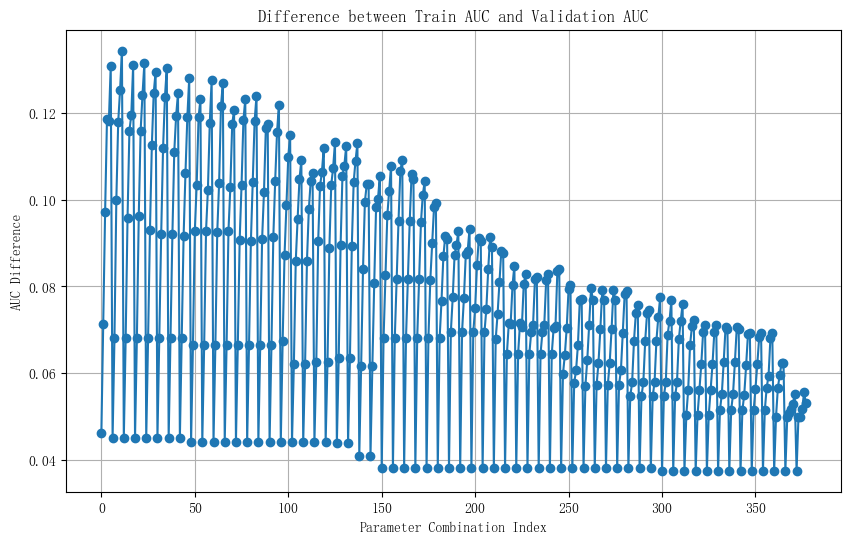

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the difference between training and validation AUC
auc_diff = np.array([train_auc - val_auc for (_, _, train_auc), (_, _, val_auc) in zip(train_auc_results, val_auc_results)])

# Visualize the difference between training and validation AUC
plt.figure(figsize=(10, 6))
plt.plot(auc_diff, marker='o', linestyle='-')
plt.title('Difference between Train AUC and Validation AUC')
plt.xlabel('Parameter Combination Index')
plt.ylabel('AUC Difference')
plt.grid(True)
plt.show()


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# New parameter ranges
min_samples_split_range = range(8, 70, 3)
min_samples_leaf_range = range(2, 15)

# Create empty arrays to store training and validation AUC values for each parameter combination
train_auc_results = np.zeros((len(min_samples_split_range), len(min_samples_leaf_range)))
val_auc_results = np.zeros((len(min_samples_split_range), len(min_samples_leaf_range)))

# Iterate over different parameter combinations and calculate training and validation AUC
for i, min_samples_split in enumerate(min_samples_split_range):
    for j, min_samples_leaf in enumerate(min_samples_leaf_range):
        # Initialize GBM model and set parameters
        gbm_model = GradientBoostingClassifier(learning_rate=0.01,
                                               n_estimators=100,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf,
                                               max_depth=3,
                                               random_state=321)
        
        # Train the model
        gbm_model.fit(train_X, train_y)
        
        # Calculate training AUC
        train_auc = roc_auc_score(train_y, gbm_model.predict_proba(train_X)[:, 1])
        train_auc_results[i, j] = train_auc
        
        # Calculate validation AUC
        val_auc = roc_auc_score(test_y, gbm_model.predict_proba(test_X)[:, 1])
        val_auc_results[i, j] = val_auc

# Output parameter combinations and corresponding AUC values
print("min_samples_split \t min_samples_leaf \t Train AUC \t Validation AUC")
for i, min_samples_split in enumerate(min_samples_split_range):
    for j, min_samples_leaf in enumerate(min_samples_leaf_range):
        print(f"{min_samples_split} \t\t\t {min_samples_leaf} \t\t\t {train_auc_results[i, j]} \t\t\t {val_auc_results[i, j]}")


min_samples_split 	 min_samples_leaf 	 Train AUC 	 Validation AUC
8 			 2 			 0.9385560675883257 			 0.8913432835820896
8 			 3 			 0.9414819691317388 			 0.8872636815920398
8 			 4 			 0.9420305756711287 			 0.8813930348258706
8 			 5 			 0.9401470265525564 			 0.8789054726368158
8 			 6 			 0.9419574281325435 			 0.876318407960199
8 			 7 			 0.9419574281325435 			 0.876318407960199
8 			 8 			 0.9390863872430693 			 0.8791044776119402
8 			 9 			 0.93813546924146 			 0.8775124378109452
8 			 10 			 0.937751444663887 			 0.8781094527363184
8 			 11 			 0.937641723356009 			 0.877910447761194
8 			 12 			 0.9364530758539975 			 0.8781094527363184
8 			 13 			 0.9361239119303636 			 0.8839800995024876
8 			 14 			 0.934331797235023 			 0.8831840796019901
11 			 2 			 0.9363799283154123 			 0.8911442786069652
11 			 3 			 0.9411162314388121 			 0.8866666666666666
11 			 4 			 0.9409333625923487 			 0.8879601990049751
11 			 5 			 0.9401470265525564 			 0.8789054726368158
11 			 6 			 0.

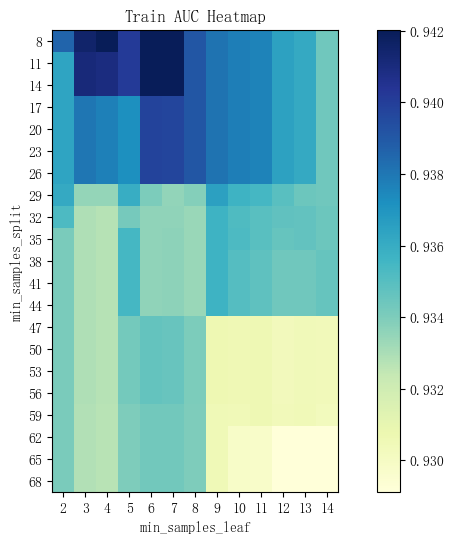

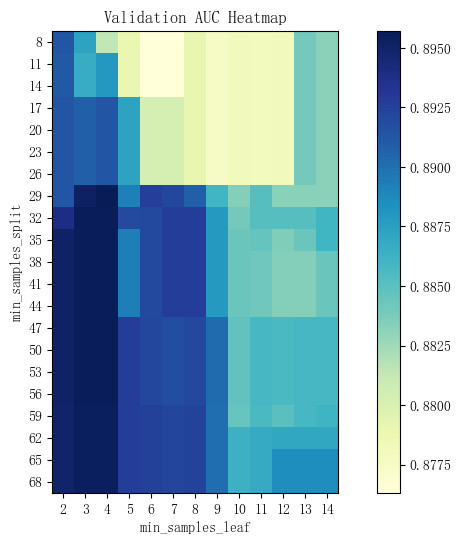

In [19]:
import matplotlib.pyplot as plt

# Plotting the heatmap for training set AUC
plt.figure(figsize=(10, 6))
plt.imshow(train_auc_results, interpolation='nearest', cmap='YlGnBu')
plt.colorbar()
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.title('Train AUC Heatmap')
plt.xticks(np.arange(len(min_samples_leaf_range)), min_samples_leaf_range)
plt.yticks(np.arange(len(min_samples_split_range)), min_samples_split_range)
plt.show()

# Plotting the heatmap for validation set AUC
plt.figure(figsize=(10, 6))
plt.imshow(val_auc_results, interpolation='nearest', cmap='YlGnBu')
plt.colorbar()
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.title('Validation AUC Heatmap')
plt.xticks(np.arange(len(min_samples_leaf_range)), min_samples_leaf_range)
plt.yticks(np.arange(len(min_samples_split_range)), min_samples_split_range)
plt.show()


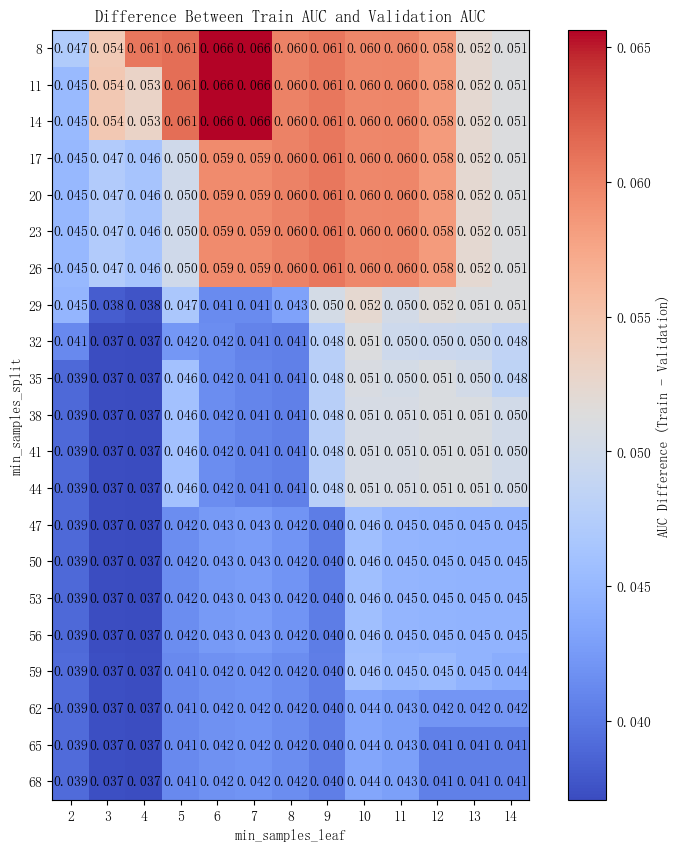

In [20]:
import matplotlib.pyplot as plt

# Calculate the difference in AUC
auc_diff = train_auc_results - val_auc_results

# Create a visualization of the differences and display numerical values
plt.figure(figsize=(10, 10))
heatmap = plt.imshow(auc_diff, interpolation='nearest', cmap='coolwarm')
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.colorbar(label='AUC Difference (Train - Validation)')
plt.xticks(ticks=np.arange(len(min_samples_leaf_range)), labels=min_samples_leaf_range)
plt.yticks(ticks=np.arange(len(min_samples_split_range)), labels=min_samples_split_range)
plt.title('Difference Between Train AUC and Validation AUC')

# Add numerical labels in each cell
for i in range(len(min_samples_split_range)):
    for j in range(len(min_samples_leaf_range)):
        plt.text(j, i, f'{auc_diff[i, j]:.3f}', ha='center', va='center', color='black')

plt.show()


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# New parameter ranges
min_samples_split_range = range(10, 50, 2)
min_samples_leaf_range = range(6, 15)

# Create empty arrays to store training and validation AUC values for each parameter combination
train_auc_results = np.zeros((len(min_samples_split_range), len(min_samples_leaf_range)))
val_auc_results = np.zeros((len(min_samples_split_range), len(min_samples_leaf_range)))

# Iterate over different parameter combinations and calculate training and validation AUC
for i, min_samples_split in enumerate(min_samples_split_range):
    for j, min_samples_leaf in enumerate(min_samples_leaf_range):
        # Initialize GBM model and set parameters
        gbm_model = GradientBoostingClassifier(learning_rate=0.01,
                                               n_estimators=100,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf,
                                               max_depth=3,
                                               random_state=321)
        
        # Train the model
        gbm_model.fit(train_X, train_y)
        
        # Calculate training AUC
        train_auc = roc_auc_score(train_y, gbm_model.predict_proba(train_X)[:, 1])
        train_auc_results[i, j] = train_auc
        
        # Calculate validation AUC
        val_auc = roc_auc_score(test_y, gbm_model.predict_proba(test_X)[:, 1])
        val_auc_results[i, j] = val_auc

# Output parameter combinations and corresponding AUC values
print("min_samples_split \t min_samples_leaf \t Train AUC \t Validation AUC")
for i, min_samples_split in enumerate(min_samples_split_range):
    for j, min_samples_leaf in enumerate(min_samples_leaf_range):
        print(f"{min_samples_split} \t\t\t {min_samples_leaf} \t\t\t {train_auc_results[i, j]} \t\t\t {val_auc_results[i, j]}")


min_samples_split 	 min_samples_leaf 	 Train AUC 	 Validation AUC
10 			 6 			 0.9419574281325435 			 0.876318407960199
10 			 7 			 0.9419574281325435 			 0.876318407960199
10 			 8 			 0.9390863872430693 			 0.8791044776119402
10 			 9 			 0.93813546924146 			 0.8775124378109452
10 			 10 			 0.937751444663887 			 0.8781094527363184
10 			 11 			 0.937641723356009 			 0.877910447761194
10 			 12 			 0.9364530758539975 			 0.8781094527363184
10 			 13 			 0.9361239119303636 			 0.8839800995024876
10 			 14 			 0.934331797235023 			 0.8831840796019901
12 			 6 			 0.9419574281325435 			 0.876318407960199
12 			 7 			 0.9419574281325435 			 0.876318407960199
12 			 8 			 0.9390863872430693 			 0.8791044776119402
12 			 9 			 0.93813546924146 			 0.8775124378109452
12 			 10 			 0.937751444663887 			 0.8781094527363184
12 			 11 			 0.937641723356009 			 0.877910447761194
12 			 12 			 0.9364530758539975 			 0.8781094527363184
12 			 13 			 0.9361239119303636 			 0.8839800995024876
12 		

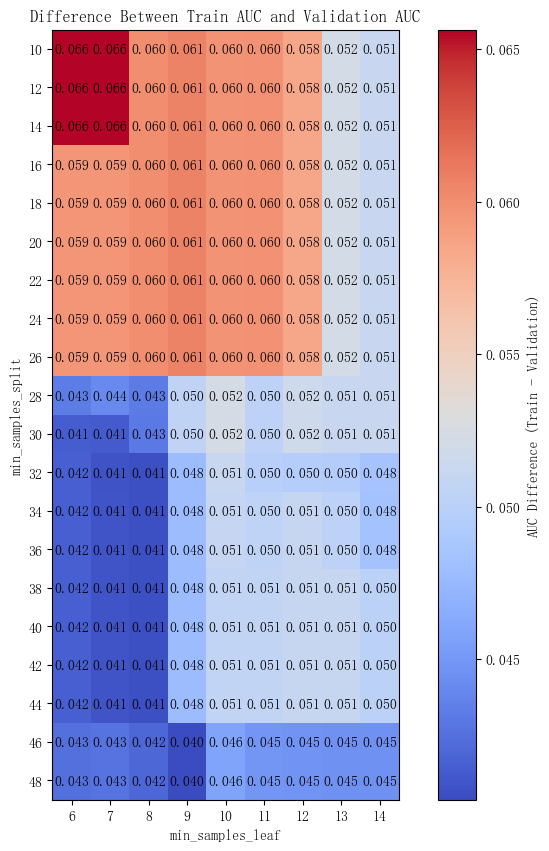

In [22]:
import matplotlib.pyplot as plt

# Calculate the difference in AUC
auc_diff = train_auc_results - val_auc_results

# Create a visualization of the differences and display numerical values
plt.figure(figsize=(10, 10))
heatmap = plt.imshow(auc_diff, interpolation='nearest', cmap='coolwarm')
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.colorbar(label='AUC Difference (Train - Validation)')
plt.xticks(ticks=np.arange(len(min_samples_leaf_range)), labels=min_samples_leaf_range)
plt.yticks(ticks=np.arange(len(min_samples_split_range)), labels=min_samples_split_range)
plt.title('Difference Between Train AUC and Validation AUC')

# Add numerical labels in each cell
for i in range(len(min_samples_split_range)):
    for j in range(len(min_samples_leaf_range)):
        plt.text(j, i, f'{auc_diff[i, j]:.3f}', ha='center', va='center', color='black')

plt.show()


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming train_X, train_y, test_X, test_y are already prepared
# If not, you would need to split your dataset to obtain training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists for accuracy and AUC
accuracies = []
train_aucs = []
test_aucs = []

# Loop over max_features=i, ranging from 1 to 20
for i in range(1, 21):
    # Initialize GBM model and set parameters
    gbm_model = GradientBoostingClassifier(learning_rate=0.01,
                                           n_estimators=100,
                                           min_samples_split=32,
                                           min_samples_leaf=3,
                                           max_depth=3,
                                           max_features=i,
                                           random_state=321)
    
    # Train the model
    gbm_model.fit(train_X, train_y)
    
    # Predict probabilities for training and testing sets
    train_probs = gbm_model.predict_proba(train_X)[:, 1]
    test_probs = gbm_model.predict_proba(test_X)[:, 1]
    
    # Calculate AUC for training and testing sets
    train_auc = roc_auc_score(train_y, train_probs)
    test_auc = roc_auc_score(test_y, test_probs)
    
    # Append AUC values to the lists
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)
    
    # Calculate accuracy for the training set
    preds = gbm_model.predict(train_X)
    accuracy = accuracy_score(train_y, preds)
    
    # Append accuracy to the list
    accuracies.append(accuracy)

# Output accuracy and AUC for each max_features value
for i, (accuracy, train_auc, test_auc) in enumerate(zip(accuracies, train_aucs, test_aucs), start=1):
    print(f"max_features={i}: Accuracy={accuracy:.4f}, Train AUC={train_auc:.4f}, Test AUC={test_auc:.4f}")

# Find the best max_features value (based on Test AUC)
best_max_features = test_aucs.index(max(test_aucs)) + 1
print(f"Best max_features based on Test AUC: {best_max_features}")


max_features=1: Accuracy=0.8378, Train AUC=0.9321, Test AUC=0.8861
max_features=2: Accuracy=0.8619, Train AUC=0.9353, Test AUC=0.8903
max_features=3: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=4: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=5: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=6: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=7: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=8: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=9: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=10: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=11: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=12: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=13: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=14: Accuracy=0.8619, Train AUC=0.9329, Test AUC=0.8956
max_features=15: Accuracy=0.8619, Train AUC=0.9329, Test 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Define the parameter ranges to tune
learning_rates = [0.008]
n_estimators_list = range(250, 400)

# Create empty lists to store models and AUC differences
models = []
auc_diffs = []

# Iterate over the parameter ranges
for lr in learning_rates:
    for n_est in n_estimators_list:
        # Create the model
        GB = GradientBoostingClassifier(learning_rate=lr,
                                        n_estimators=n_est,
                                        min_samples_split=32,
                                        min_samples_leaf=3,
                                        max_depth=3,
                                        max_features=3,
                                        random_state=321)
        # Train the model
        GB.fit(train_X, train_y)
        
        # Calculate AUC for training and testing sets
        train_pred_prob = GB.predict_proba(train_X)[:, 1]
        test_pred_prob = GB.predict_proba(test_X)[:, 1]
        
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)
        
        # Calculate AUC difference
        auc_diff = train_auc - test_auc
        
        # Store the model and AUC difference
        models.append(GB)
        auc_diffs.append(auc_diff)

# Find the model with the smallest AUC difference
best_index = np.argmin(np.abs(auc_diffs))
best_model = models[best_index]
best_auc_diff = auc_diffs[best_index]

print("Best parameters:", best_model.get_params())
print("Best AUC difference:", best_auc_diff)

Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.008, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 32, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 251, 'n_iter_no_change': None, 'random_state': 321, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best AUC difference: 0.05842426009081225


In [25]:
    best_GB = GradientBoostingClassifier(learning_rate=0.008,  
                                           n_estimators=251,  
                                           min_samples_split=32,  
                                           min_samples_leaf=3,  
                                           max_depth=3,  
                                           max_features=3,  
                                           subsample=0.7,  
                                           random_state=321)  
      
    best_GB.fit(train_X, train_y)  

GradientBoostingClassifier(learning_rate=0.008, max_features=3,
                           min_samples_leaf=3, min_samples_split=32,
                           n_estimators=251, random_state=321, subsample=0.7)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Define the parameter ranges to tune
learning_rates = [0.009]
n_estimators_list = range(200, 301)

# Create empty lists to store models and AUC differences
models = []
auc_diffs = []

# Iterate over the parameter ranges
for lr in learning_rates:
    for n_est in n_estimators_list:
        # Create the model
        GB = GradientBoostingClassifier(learning_rate=lr,
                                        n_estimators=n_est,
                                        min_samples_split=20,
                                        min_samples_leaf=24,
                                        max_depth=3,
                                        max_features=3,
                                        subsample=0.7,
                                        random_state=321)
        # Train the model
        GB.fit(train_X, train_y)
        
        # Calculate AUC for training and testing sets
        train_pred_prob = GB.predict_proba(train_X)[:, 1]
        test_pred_prob = GB.predict_proba(test_X)[:, 1]
        
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)
        
        # Calculate AUC difference
        auc_diff = train_auc - test_auc
        
        # Store the model and AUC difference
        models.append(GB)
        auc_diffs.append(auc_diff)

# Find the model with the smallest AUC difference
best_index = np.argmin(np.abs(auc_diffs))
best_model = models[best_index]
best_auc_diff = auc_diffs[best_index]

print("Best parameters:", best_model.get_params())
print("Best AUC difference:", best_auc_diff)


Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.009, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 24, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 234, 'n_iter_no_change': None, 'random_state': 321, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best AUC difference: 0.04428689338036629


In [27]:
    best_GB = GradientBoostingClassifier(learning_rate=0.009,  
                                           n_estimators=251,  
                                           min_samples_split=50,  
                                           min_samples_leaf=20,  
                                           max_depth=2,  
                                           max_features=3,  
                                           subsample=0.8,  
                                           random_state=321)  
      

    best_GB.fit(train_X, train_y)  

GradientBoostingClassifier(learning_rate=0.009, max_depth=2, max_features=3,
                           min_samples_leaf=20, min_samples_split=50,
                           n_estimators=251, random_state=321, subsample=0.8)

In [28]:
test_gb_pred_proba = best_GB.predict_proba(test_X)[:, 1]
test_auc = roc_auc_score(test_y, test_gb_pred_proba)
GBboost_y_pred=best_GB.predict(test_X)
print("testAUC:", test_auc)
fprgb,tprgb,threshold = roc_curve(test_y,test_gb_pred_proba)
auc(fprgb,tprgb)

testAUC: 0.8880597014925373


0.8880597014925373

In [29]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Set random seed
np.random.seed(321)

# Set the number of bootstrap resamples
n_bootstraps = 1000

# Store AUC scores calculated from each bootstrap sample
auc_scores = []

# Perform bootstrap resampling
for _ in range(n_bootstraps):
    # Sample with replacement from the test data
    indices = np.random.choice(len(test_y), len(test_y), replace=True)
    bootstrap_test_pred_proba = test_gb_pred_proba[indices]
    bootstrap_test_y = test_y[indices]
    
    # Calculate AUC and store it
    bootstrap_auc = roc_auc_score(bootstrap_test_y, bootstrap_test_pred_proba)
    auc_scores.append(bootstrap_auc)

# Calculate lower and upper bounds of the confidence interval
lower_bound = np.percentile(auc_scores, 2.5)
upper_bound = np.percentile(auc_scores, 97.5)

print("95% confidence interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


95% confidence interval: [0.8327, 0.9464]


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_y, GBboost_y_pred)

# Calculate precision
precision = precision_score(test_y, GBboost_y_pred)

# Calculate recall
recall = recall_score(test_y, GBboost_y_pred)

# Calculate F1 score
f1 = f1_score(test_y, GBboost_y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8028169014084507
Precision: 0.8421052631578947
Recall: 0.7164179104477612
F1 Score: 0.7741935483870968


In [31]:
GBboost_train_y_pred=best_GB.predict(train_X)
train_GB_pred_proba = best_GB.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_GB_pred_proba)
print("Training AUC:", train_auc )

Training AUC: 0.9266513056835638


In [32]:
fprGB,tprGB,threshold = roc_curve(train_y,train_GB_pred_proba)
auc(fprGB,tprGB)

0.9266513056835638

In [33]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Set random seed
np.random.seed(321)

# Set the number of bootstrap resamples
n_bootstraps = 1000

# Store AUC scores calculated from each bootstrap sample
auc_scores = []

# Perform bootstrap resampling
for _ in range(n_bootstraps):
    # Sample with replacement from the training data
    indices = np.random.choice(len(train_y), len(train_y), replace=True)
    bootstrap_train_pred_proba = train_pred_proba[indices]  # Assuming train_pred_proba is defined elsewhere
    bootstrap_train_y = train_y[indices]
    
    # Calculate AUC and store it
    bootstrap_auc = roc_auc_score(bootstrap_train_y, bootstrap_train_pred_proba)
    auc_scores.append(bootstrap_auc)

# Calculate lower and upper bounds of the confidence interval
lower_bound = np.percentile(auc_scores, 2.5)
upper_bound = np.percentile(auc_scores, 97.5)

print("95% confidence interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


95% confidence interval: [0.9275, 0.9679]


In [34]:
best_GB_y_score =best_GB.predict_proba(test_X)[:, 1]

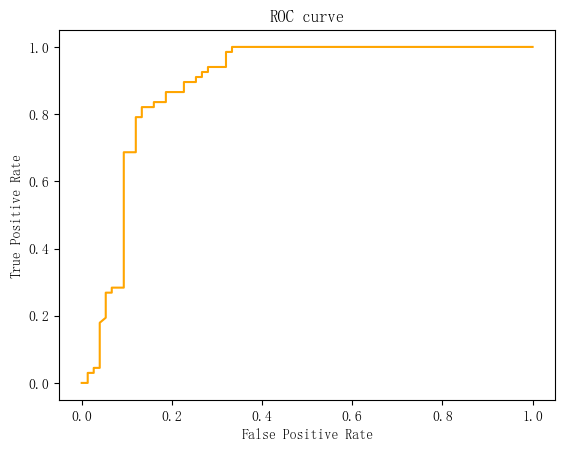

In [35]:
plt.figure()
plt.plot(fprgb,tprgb, color='orange')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()

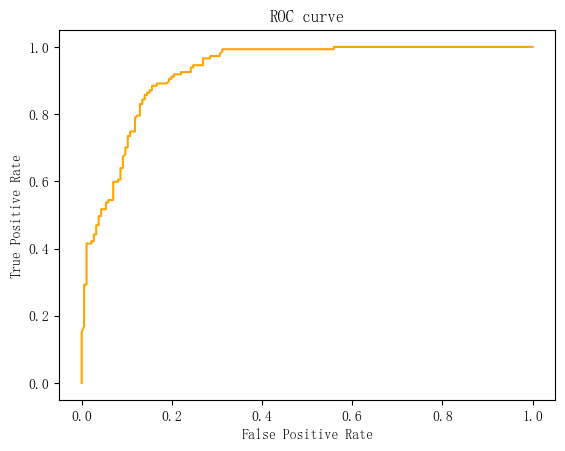

In [36]:
plt.figure()
plt.plot(fprGB,tprGB, color='orange')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()

In [37]:
#"Here were calibration curves adjustments for each hyperparameter."
# "For simplicity, I won't elaborate further."

In [38]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [41]:
#Here is the final model.

from sklearn.ensemble import GradientBoostingClassifier
#Random_state will affect the ROC and caliberation curve.
best_GB = GradientBoostingClassifier(learning_rate=0.005,
                                     n_estimators=278,
                                     min_samples_split=38,
                                     min_samples_leaf=27,
                                     max_depth=3,
                                     max_features=2,
                                     subsample=0.7,
                                     random_state=102030)

best_GB.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           min_samples_leaf=27, min_samples_split=38,
                           n_estimators=278, random_state=102030,
                           subsample=0.7)

In [42]:
test_gb_pred_proba = best_GB.predict_proba(test_X)[:, 1]
test_auc = roc_auc_score(test_y, test_gb_pred_proba)
GBboost_y_pred=best_GB.predict(test_X)
print("testAUC:", test_auc)
fprgb,tprgb,threshold = roc_curve(test_y,test_gb_pred_proba)
auc(fprgb,tprgb)

testAUC: 0.8906467661691542


0.8906467661691542

In [43]:
GBboost_train_y_pred=best_GB.predict(train_X)
train_GB_pred_proba = best_GB.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_GB_pred_proba)
print("Training AUC:", train_auc )

Training AUC: 0.9233230926779313


In [44]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, GBboost_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort( GBboost_y_pred )  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y, GBboost_y_pred )  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on p-value
if p_value < 0.05:
    print("Poor model calibration")
else:
    print("Well-calibrated model")

Chi-squared: 13.931517965112386
P-value: 0.12478220479239868
Degrees of freedom: 8
Well-calibrated model


In [45]:
clf_1_list = [
    (best_GB, "best_GB")
]

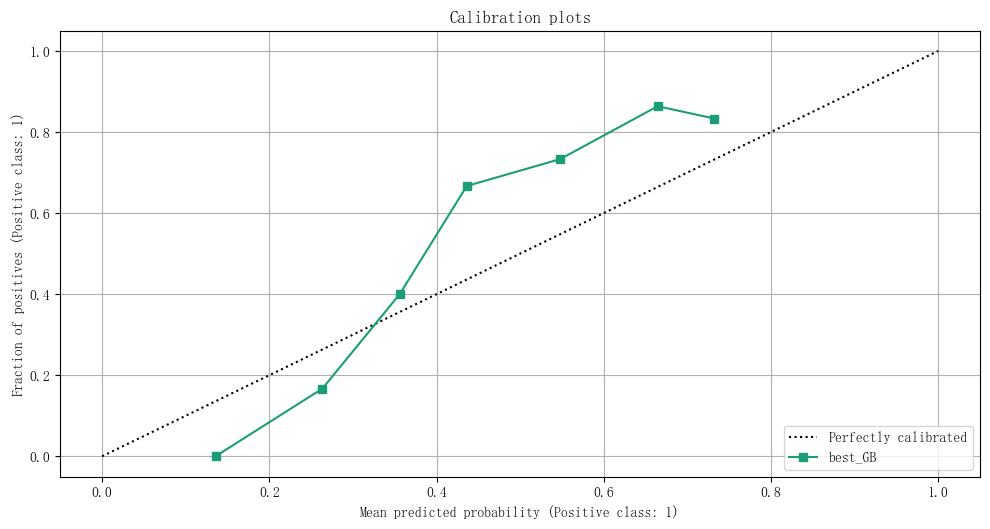

In [46]:
# Set random seed for both numpy and Python's random module
np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two lists of classifiers
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [47]:
# Calculate metrics for the training set and the test set.
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,GBboost_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y,GBboost_y_pred)

# ptint
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"PPV (Precision): {ppv_train:.4f}")
print(f"NPV: {npv_train:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.4f}")
print(f"MCC: {mcc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.4f}")
print(f"MCC: {mcc_test:.4f}")

Train Set Metrics:
Sensitivity: 0.8367
Specificity: 0.8495
PPV (Precision): 0.8146
NPV: 0.8681
Predictive Accuracy: 0.8438
MCC: 0.6844

Test Set Metrics:
Sensitivity: 0.7463
Specificity: 0.8533
PPV (Precision): 0.820
NPV: 0.7901
Predictive Accuracy: 0.8028
MCC: 0.6047


In [48]:
y_pred =GBboost_y_pred

Model: best_GB, Trained model: GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           min_samples_leaf=27, min_samples_split=38,
                           n_estimators=278, random_state=102030,
                           subsample=0.7)


C:\Users\12292\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


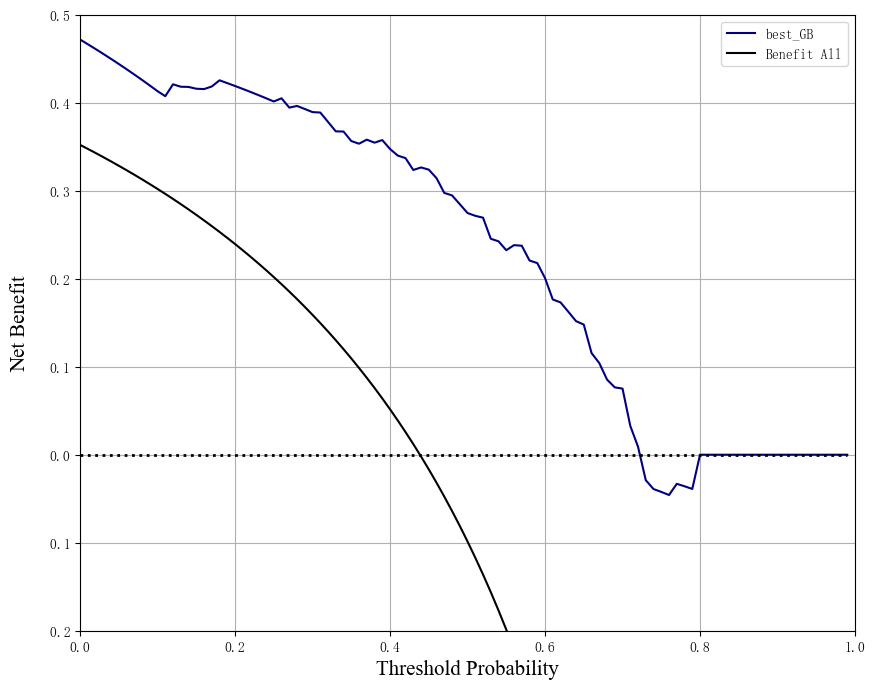

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_GB", best_GB)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()